In [28]:
#Importing the required Modules
import numpy as np
from sklearn import cluster, datasets
from sklearn.cluster import KMeans
from scipy import misc
from skimage import io

**Problem Statement:**

**In this assignment students have to compress racoon grey scale image into
5 clusters. In the end, visualize both raw and compressed image and look
for quality difference.  
The raw image is available in spicy.misc package with the name face.**

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
#Getting the face image and storing the same to face variable
face=misc.face(gray=True)

In [31]:
#Getting no of rows and columns
face.shape

(768, 1024)

In [32]:
face

array([[114, 130, 145, ..., 119, 129, 137],
       [ 83, 104, 123, ..., 118, 134, 146],
       [ 68,  88, 109, ..., 119, 134, 145],
       ...,
       [ 98, 103, 116, ..., 144, 143, 143],
       [ 94, 104, 120, ..., 143, 142, 142],
       [ 94, 106, 119, ..., 142, 141, 140]], dtype=uint8)

In [33]:
X=face.reshape((-1,1))

In [34]:
cluster_cnt=5

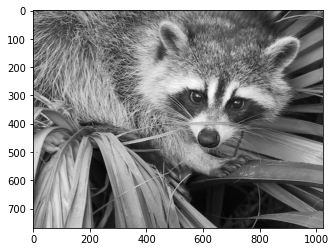

In [35]:
plt.imshow(face,cmap=plt.cm.gray)

In [36]:
k_model=KMeans(n_clusters=cluster_cnt)

In [37]:
k_model.fit(X)

KMeans(n_clusters=5)

In [38]:
labels=k_model.labels_

In [39]:
values=k_model.cluster_centers_.squeeze()

In [40]:
print(labels)
print(values)

[0 0 4 ... 4 4 4]
[113.5564522   27.62031146 193.5128744   74.85967928 151.7770878 ]


In [41]:
np.random.seed(0)
img_compressed=np.choose(labels,values)

In [42]:
print('Compressed Image Shape: ',img_compressed.shape)
print('Original Image Shape: ',face.shape)

Compressed Image Shape:  (786432,)
Original Image Shape:  (768, 1024)


In [43]:
img_compressed.shape=face.shape

In [44]:
comp_img=np.asarray(img_compressed,dtype = np.uint8)

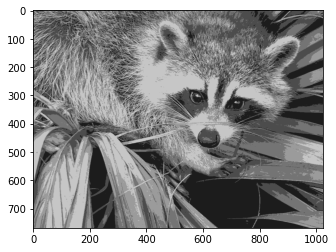

In [45]:
plt.imshow(img_compressed,cmap=plt.cm.gray,vmin=face.min(),vmax=face.max())
plt.show()

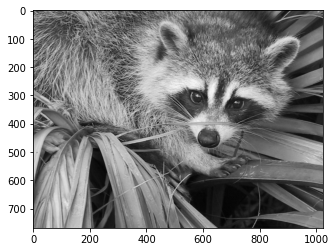

In [47]:
plt.imshow(face,cmap=plt.cm.gray,vmin=face.min(),vmax=255)

In [48]:
io.imsave('img-compressed.png', comp_img);

In [49]:
io.imsave('img-grey.png', face);